Working Title: 
Household Inequities as Fundamental Cause of Child Health Disparities in Nigeria

In [1]:
set more off

(-set more- irrelevant in this version of Stata)


In [2]:
set maxvar 120000

In [3]:
log using "Log for MA Thesis", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health
> /Log for MA Thesis.smcl
  log type:  smcl
 opened on:  11 Feb 2025, 10:26:15


load data

In [4]:
use /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/NGKR7BDT/NGKR7BFL.DTA, clear

This dataset uses multi-stage cluster sampling, and the standard errors would be incorrect if survey weight is not applied. This will help to produce estimates that are representative of the Nigerian population and account for the complex sampling structure of the DHS dataset.

In [5]:
svyset [pw= v005], psu(v021) strata(v022)


Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>


Checking if the survey-weighted setting worked

In [6]:
svydes


Survey: Describing stage 1 sampling units

Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>

                                    Number of obs per unit
 Stratum   # units     # obs       Min      Mean       Max
----------------------------------------------------------
       1         5        90        14      18.0        23
       2        33       818        12      24.8        36
       3        22       440         6      20.0        36
       4        13       363        10      27.9        52
       5        12       207        10      17.2        29
       6        24       413         2      17.2        32
       7        24       455         4      19.0        40
       8        11       239        14      21.7        46
       9         9       208        11      23.1        42
      10        26       626         5      24.1        44
      11        10       264        14 

keep variables of interest

In [7]:
keep caseid b8 v001 v002 v003 v005 v190 v021 v022 v025 v024 v106 v151 h10 h11 h22 hw70 hw71 hw72 

In [8]:
codebook


-------------------------------------------------------------------------------
caseid                                                      case identification
-------------------------------------------------------------------------------

                  Type: String (str15)

         Unique values: 21,792                    Missing "": 0/33,924

              Examples: "286  22  3"
                        "481  53  2"
                        "665  47  2"
                        "939  17  9"


-------------------------------------------------------------------------------
v001                                                             cluster number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,1400]                      Units: 1
         Unique values: 1,389                     Missing .: 0/33,924

                  Mean: 612.956
             Std. dev.: 358.907

           Percen

Since not all households in have child(ren) under 5, keep only households with child(ren) under the age of 5

In [9]:
replace hw70 = hw70 / 100
replace hw71 = hw71 / 100
replace hw72 = hw72 / 100

variable hw70 was int now float
(11,458 real changes made)
variable hw71 was int now float
(11,450 real changes made)
variable hw72 was int now float
(11,436 real changes made)



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        hw70 |     11,471   -.5566646    9.882177      -5.99      99.98
        hw71 |     11,472   -.9262099    4.300253      -5.94      99.98
        hw72 |     11,476    .3247412    7.946526      -4.99      99.98
(bin=50, start=-5.9899998, width=2.1194001)
(bin=50, start=-5.9400001, width=2.1184001)
(bin=50, start=-4.9899998, width=2.0994001)


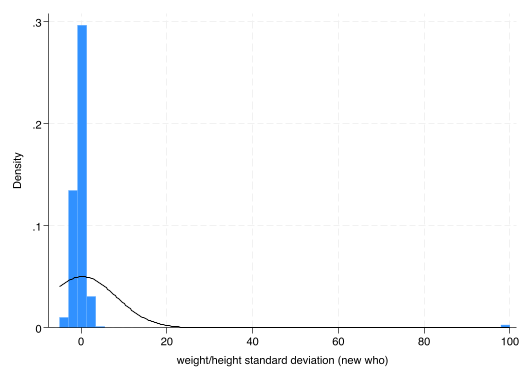

In [10]:
summarize hw70 hw71 hw72
histogram hw70, bin(50) normal
histogram hw71, bin(50) normal
histogram hw72, bin(50) normal

In [11]:
replace hw70 = . if hw70 > 6 | hw70 < -6
replace hw71 = . if hw71 > 6 | hw71 < -6
replace hw72 = . if hw72 > 6 | hw72 < -6

(107 real changes made, 107 to missing)
(19 real changes made, 19 to missing)
(71 real changes made, 71 to missing)



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        hw70 |     11,364   -1.503288    1.581818      -5.99       5.99
        hw71 |     11,453   -1.093609    1.265616      -5.94       4.41
        hw72 |     11,405   -.2956046    1.154821      -4.99       4.85
(bin=50, start=-5.9899998, width=.23959999)
(bin=50, start=-5.9400001, width=.207)
(bin=50, start=-4.9899998, width=.19679999)


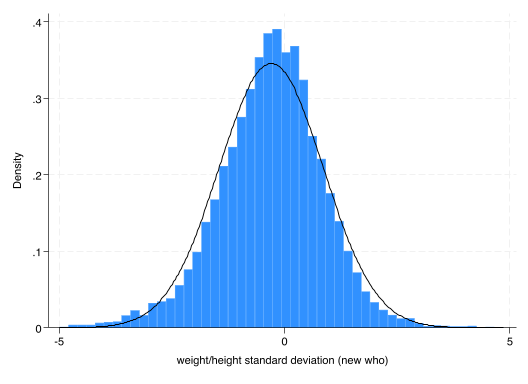

In [12]:
summarize hw70 hw71 hw72
histogram hw70, bin(50) normal
histogram hw71, bin(50) normal
histogram hw72, bin(50) normal

In [13]:
* Stunting (Binary: Stunted vs. Not Stunted)
gen stunting = .
replace stunting = 0 if hw70 >= -2  // Not Stunted
replace stunting = 1 if hw70 < -2   // Stunted
label define stunting_lbl 0 "Not Stunted" 1 "Stunted"
label values stunting stunting_lbl

(33,924 missing values generated)
(29,815 real changes made)
(4,109 real changes made)


In [14]:
* Wasting (Binary: Wasted vs. Not Wasted)
gen wasting = .
replace wasting = 0 if hw71 >= -2  // Not Wasted
replace wasting = 1 if hw71 < -2   // Wasted
label define wasting_lbl 0 "Not Wasted" 1 "Wasted"
label values wasting wasting_lbl

(33,924 missing values generated)
(31,435 real changes made)
(2,489 real changes made)


In [15]:
* Underweight (Binary: Underweight vs. Not Underweight)
gen underweight = .
replace underweight = 0 if hw72 >= -2  // Not Underweight
replace underweight = 1 if hw72 < -2   // Underweight
label define underweight_lbl 0 "Not Underweight" 1 "Underweight"
label values underweight underweight_lbl

(33,924 missing values generated)
(33,154 real changes made)
(770 real changes made)


recoding household wealth index

In [16]:
recode v190 (1 2 = 1 "poor_households") (3 = 2 "average_households") (4 5 = 3 "rich_households"), gen(household_wealth)

(25,858 differences between v190 and household_wealth)


In [17]:
tab household_wealth


    RECODE of v190 |
     (wealth index |
         combined) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
   poor_households |     15,809       46.60       46.60
average_households |      7,171       21.14       67.74
   rich_households |     10,944       32.26      100.00
-------------------+-----------------------------------
             Total |     33,924      100.00


In [18]:
label define wealth_label 1 "Poor_households" 2 "Average_Households" 3 "Rich_Households"
label values household_wealth wealth_label
tab household_wealth



    RECODE of v190 |
     (wealth index |
         combined) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
   Poor_households |     15,809       46.60       46.60
Average_Households |      7,171       21.14       67.74
   Rich_Households |     10,944       32.26      100.00
-------------------+-----------------------------------
             Total |     33,924      100.00


Collapse data to household level

In [19]:
collapse (max) h10 h11 h22 stunting wasting underweight v005 v021 v022 (count) num_children = b8 ///
(first) v190 household_wealth v025 v024 v106, by(v001 v002)

Checking the structure of the collapsed dataset

In [20]:
list v001 v002 stunting wasting underweight num_children if _n <= 10


       +--------------------------------------------------------+
       | v001   v002   stunting   wasting   underw~t   num_ch~n |
       |--------------------------------------------------------|
    1. |    1      1          0         0          0          1 |
    2. |    1     11          0         0          0          1 |
    3. |    1     25          0         0          0          1 |
    4. |    1     35          1         0          0          1 |
    5. |    1     40          0         0          0          1 |
       |--------------------------------------------------------|
    6. |    1     64          0         0          0          1 |
    7. |    1     78          0         0          0          1 |
    8. |    1     83          0         0          0          1 |
    9. |    1     93          1         1          0          1 |
   10. |    1    117          0         0          0          2 |
       +--------------------------------------------------------+


Renaming other varibales for easy identification

In [21]:
label variable v025 residence_type
label variable v024 geopolitical_region
label variable v106 mother_education
label variable h10 vaccination
label variable h11 diarrhea
label variable h22 fever

In [22]:
rename v025 residence_type
rename v024 geopolitical_region
rename v106 mother_education
rename h10 vaccination
rename h11 diarrhea
rename h22 fever

In [23]:
describe


Contains data
 Observations:        19,236                  
    Variables:            17                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v001            int     %8.0g                 cluster number
v002            int     %8.0g                 household number
vaccination     byte    %8.0g                 vaccination
diarrhea        byte    %8.0g                 diarrhea
fever           byte    %8.0g                 fever
stunting        float   %11.0g                (max) stunting
wasting         float   %10.0g                (max) wasting
underweight     float   %15.0g                (max) underweight
v005            long    %12.0g                (max) v005
v021            int     %8.0g                 (max) v021
v022            byte    %8.0g            

To confirm that each household appears once without duplicate

In [24]:
duplicates report v001 v002


Duplicates in terms of v001 v002

--------------------------------------
   Copies | Observations       Surplus
----------+---------------------------
        1 |        19236             0
--------------------------------------


This dataset uses multi-stage cluster sampling, and the standard errors would be incorrect if survey weight is not applied. This will help to produce estimates that are representative of the Nigerian population and account for the complex sampling structure of the DHS dataset. 

Reapply survey weight

In [25]:
svyset [pw= v005], psu(v021) strata(v022)


Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>


In [26]:
save "recodedchildren_under5.dta", replace

file recodedchildren_under5.dta saved


Descriptive statistics

In [27]:
use /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/recodedchildren_under5.dta, clear

In [28]:
describe


Contains data from /Users/johnadeleke/Desktop/Household_inequalities_and_Child_
> Health/recodedchildren_under5.dta
 Observations:        19,236                  
    Variables:            17                  11 Feb 2025 10:26
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v001            int     %8.0g                 cluster number
v002            int     %8.0g                 household number
vaccination     byte    %8.0g                 vaccination
diarrhea        byte    %8.0g                 diarrhea
fever           byte    %8.0g                 fever
stunting        float   %11.0g                (max) stunting
wasting         float   %10.0g                (max) wasting
underweight     float   %15.0g                (max) underweight
v005            long    %12.0g      

In [29]:
codebook


-------------------------------------------------------------------------------
v001                                                             cluster number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,1400]                      Units: 1
         Unique values: 1,389                     Missing .: 0/19,236

                  Mean: 636.883
             Std. dev.: 379.728

           Percentiles:     10%       25%       50%       75%       90%
                            150       329       599       916      1219

-------------------------------------------------------------------------------
v002                                                           household number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,274]                       Units: 1
         Unique values: 207     

In [30]:
summarize stunting wasting underweight household_wealth mother_education residence_type geopolitical_region


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
    stunting |     19,236    .1629757    .3693531          0          1
     wasting |     19,236    .1054793     .307178          0          1
 underweight |     19,236    .0375338    .1900707          0          1
household_~h |     19,236    1.920566    .8845679          1          3
mother_edu~n |     19,236    1.116604     1.04799          0          3
-------------+---------------------------------------------------------
residence_~e |     19,236    1.626222    .4838184          1          2
geopolitic~n |     19,236    3.163496    1.616892          1          6


In [31]:
tabstat stunting wasting underweight household_wealth geopolitical_region, by(residence_type) statistics(mean sd count) columns(statistics)



Summary for variables: stunting wasting underweight household_wealth geopolitic
> al_region
Group variable: residence_type (residence_type)

residence_type |      Mean        SD         N
---------------+------------------------------
             1 |  .1315716   .338048      7190
               |  .0799722   .271269      7190
               |  .0299026  .1703306      7190
               |   2.52267  .7181649      7190
               |  3.706815  1.743456      7190
---------------+------------------------------
             2 |  .1817201  .3856297     12046
               |   .120704  .3257965     12046
               |  .0420887  .2007998     12046
               |  1.561182  .7720958     12046
               |    2.8392  1.441988     12046
---------------+------------------------------
         Total |  .1629757  .3693531     19236
               |  .1054793   .307178     19236
               |  .0375338  .1900707     19236
               |  1.920566  .8845679     19236
            

Does household wealth impact each child health outcome? Association?

In [32]:
tabulate stunting household_wealth, chi2
tabulate wasting household_wealth, chi2
tabulate underweight household_wealth, chi2


     (max) |     (first) household_wealth
  stunting |         1          2          3 |     Total
-----------+---------------------------------+----------
         0 |     6,661      3,353      6,087 |    16,101 
         1 |     1,689        711        735 |     3,135 
-----------+---------------------------------+----------
     Total |     8,350      4,064      6,822 |    19,236 

          Pearson chi2(2) = 251.3893   Pr = 0.000

     (max) |     (first) household_wealth
   wasting |         1          2          3 |     Total
-----------+---------------------------------+----------
         0 |     7,198      3,639      6,370 |    17,207 
         1 |     1,152        425        452 |     2,029 
-----------+---------------------------------+----------
     Total |     8,350      4,064      6,822 |    19,236 

          Pearson chi2(2) = 204.6564   Pr = 0.000

     (max) |
underweigh |     (first) household_wealth
         t |         1          2          3 |     Total
---------

Correllation matrix

In [33]:
pwcorr stunting wasting underweight household_wealth mother_education residence_type geopolitical_region


             | stunting  wasting underw~t househ~h mother~n reside~e geopol~n
-------------+---------------------------------------------------------------
    stunting |   1.0000 
     wasting |   0.6458   1.0000 
 underweight |   0.2320   0.4549   1.0000 
household_~h |  -0.1122  -0.1031  -0.0423   1.0000 
mother_edu~n |  -0.1348  -0.1295  -0.0515   0.6068   1.0000 
residence_~e |   0.0657   0.0642   0.0310  -0.5259  -0.3788   1.0000 
geopolitic~n |  -0.0350  -0.0310  -0.0196   0.3346   0.3401  -0.2596   1.0000 


In [34]:
reg stunting i.household_wealth


      Source |       SS           df       MS      Number of obs   =    19,236
-------------+----------------------------------   F(2, 19233)     =    127.34
       Model |  34.2931703         2  17.1465852   Prob > F        =    0.0000
    Residual |   2589.7781    19,233  .134652842   R-squared       =    0.0131
-------------+----------------------------------   Adj R-squared   =    0.0130
       Total |  2624.07127    19,235  .136421693   Root MSE        =    .36695

------------------------------------------------------------------------------
    stunting | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |  -.0273247   .0070185    -3.89   0.000    -.0410815   -.0135678
          3  |  -.0945358   .0059887   -15.79   0.000    -.1062741   -.0827975
             |
       _cons |   .2022754   .0040157    50.37   0.000     .1944043    .2101466
--------------------

In [35]:
reg wasting i.household_wealth


      Source |       SS           df       MS      Number of obs   =    19,236
-------------+----------------------------------   F(2, 19233)     =    103.41
       Model |  19.3100354         2  9.65501769   Prob > F        =    0.0000
    Residual |  1795.67245    19,233  .093364137   R-squared       =    0.0106
-------------+----------------------------------   Adj R-squared   =    0.0105
       Total |  1814.98248    19,235   .09435833   Root MSE        =    .30556

------------------------------------------------------------------------------
     wasting | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |  -.0333873   .0058442    -5.71   0.000    -.0448425   -.0219321
          3  |  -.0717078   .0049867   -14.38   0.000    -.0814822   -.0619335
             |
       _cons |   .1379641   .0033439    41.26   0.000     .1314098    .1445183
--------------------

In [36]:
reg underweight i.household_wealth


      Source |       SS           df       MS      Number of obs   =    19,236
-------------+----------------------------------   F(2, 19233)     =     17.22
       Model |  1.24245592         2   .62122796   Prob > F        =    0.0000
    Residual |  693.658147    19,233   .03606604   R-squared       =    0.0018
-------------+----------------------------------   Adj R-squared   =    0.0017
       Total |  694.900603    19,235  .036126883   Root MSE        =    .18991

------------------------------------------------------------------------------
 underweight | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |  -.0083469   .0036323    -2.30   0.022    -.0154666   -.0012272
          3  |  -.0181906   .0030994    -5.87   0.000    -.0242656   -.0121156
             |
       _cons |   .0457485   .0020783    22.01   0.000     .0416749    .0498221
--------------------

In [37]:
logit stunting i.household_wealth##i.residence_type##i.geopolitical_region, or
logit wasting i.household_wealth##i.residence_type##i.geopolitical_region, or
logit underweight i.household_wealth##i.residence_type##i.geopolitical_region, or


Iteration 0:  Log likelihood = -8551.7763  
Iteration 1:  Log likelihood = -8360.8244  
Iteration 2:  Log likelihood = -8354.3413  
Iteration 3:  Log likelihood = -8354.3079  
Iteration 4:  Log likelihood = -8354.3079  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(35)   = 394.94
                                                        Prob > chi2   = 0.0000
Log likelihood = -8354.3079                             Pseudo R2     = 0.0231

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |   .8822134   .2662125    -0.42   0.678     .4883365    1.593779
          3  |   .4188014   .1102016    -3.31   0.001     .2500499    .7014386
             |
2.residenc~e |   .9646107   .2331556

In [38]:
* Interaction for Stunting
logit stunting i.household_wealth##i.residence_type##i.geopolitical_region, or
margins household_wealth#residence_type



Iteration 0:  Log likelihood = -8551.7763  
Iteration 1:  Log likelihood = -8360.8244  
Iteration 2:  Log likelihood = -8354.3413  
Iteration 3:  Log likelihood = -8354.3079  
Iteration 4:  Log likelihood = -8354.3079  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(35)   = 394.94
                                                        Prob > chi2   = 0.0000
Log likelihood = -8354.3079                             Pseudo R2     = 0.0231

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |   .8822134   .2662125    -0.42   0.678     .4883365    1.593779
          3  |   .4188014   .1102016    -3.31   0.001     .2500499    .7014386
             |
2.residenc~e |   .9646107   .2331556


Predictive margins                                      Number of obs = 19,236
Model VCE: OIM

Expression: Pr(stunting), predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h#|
residence_~e |
        1 1  |   .1891113   .0142724    13.25   0.000     .1611378    .2170847
        1 2  |   .1858415   .0062373    29.80   0.000     .1736166    .1980663
        2 1  |   .1745965    .010269    17.00   0.000     .1544696    .1947235
        2 2  |   .1825895   .0081049    22.53   0.000     .1667043    .1984748
        3 1  |   .1162585   .0056997    20.40   0.000     .1050873    .1274298
        3 2  |   .1290966   .0102092    12.65   0.000     .1090868    .1491063
------------------------------------------------------------------------------

Variabl

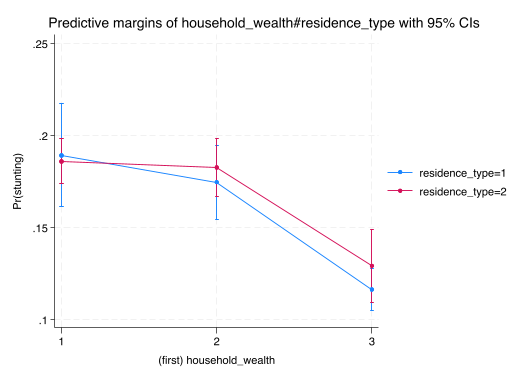

In [39]:
margins household_wealth#residence_type
marginsplot

In [40]:
* Interaction for Wasting
logit wasting i.household_wealth##i.residence_type##i.geopolitical_region, or
margins household_wealth#residence_type


Iteration 0:  Log likelihood = -6481.7258  
Iteration 1:  Log likelihood = -6304.8546  
Iteration 2:  Log likelihood = -6294.5228  
Iteration 3:  Log likelihood = -6294.4845  
Iteration 4:  Log likelihood = -6294.4845  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(35)   = 374.48
                                                        Prob > chi2   = 0.0000
Log likelihood = -6294.4845                             Pseudo R2     = 0.0289

------------------------------------------------------------------------------
     wasting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
          2  |   1.455116   .6132052     0.89   0.373     .6370742    3.323573
          3  |   .7265069   .2766506    -0.84   0.401      .344434    1.532405
             |
2.residenc~e |   1.275677   .4591251


Predictive margins                                      Number of obs = 19,236
Model VCE: OIM

Expression: Pr(wasting), predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h#|
geopolitic~n |
        1 1  |   .0795425   .0096446     8.25   0.000     .0606394    .0984456
        1 2  |   .1378754   .0122277    11.28   0.000     .1139097    .1618412
        1 3  |   .1594389   .0082808    19.25   0.000     .1432088    .1756691
        1 4  |   .0599924   .0140777     4.26   0.000     .0324005    .0875843
        1 5  |   .0829658   .0200267     4.14   0.000     .0437142    .1222174
        1 6  |   .0975058   .0169294     5.76   0.000     .0643248    .1306868
        2 1  |   .0830625   .0101086     8.22   0.000       .06325     .102875
        2

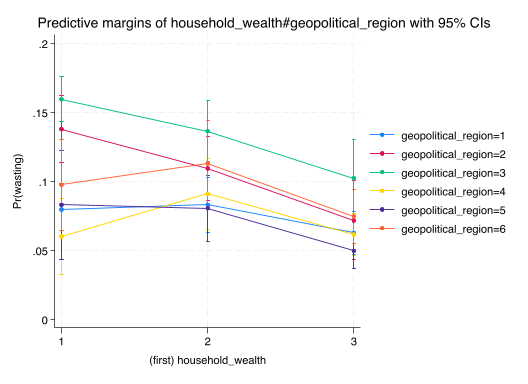

In [41]:
margins household_wealth#geopolitical_region
marginsplot

In [42]:
* Interaction for Underweight
logit underweight i.household_wealth##i.residence_type##i.geopolitical_region, or
margins household_wealth#residence_type


note: 1.household_wealth#1.residence_type#5.geopolitical_region != 0 predicts f
> ailure perfectly;
      1.household_wealth#1.residence_type#5.geopolitical_region omitted and 35 
> obs not used.

note: 3.household_wealth#2.residence_type#5.geopolitical_region omitted because
>  of collinearity.
Iteration 0:  Log likelihood = -3076.9122  
Iteration 1:  Log likelihood = -3035.2813  
Iteration 2:  Log likelihood = -3032.6263  
Iteration 3:  Log likelihood = -3032.6185  
Iteration 4:  Log likelihood = -3032.6185  

Logistic regression                                     Number of obs = 19,201
                                                        LR chi2(34)   =  88.59
                                                        Prob > chi2   = 0.0000
Log likelihood = -3032.6185                             Pseudo R2     = 0.0144

------------------------------------------------------------------------------
 underweight | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
------


Predictive margins                                      Number of obs = 19,201
Model VCE: OIM

Expression: Pr(underweight), predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h#|
residence_~e |
        1 1  |          .  (not estimable)
        1 2  |   .0386163   .0027304    14.14   0.000     .0332649    .0439677
        2 1  |   .0385741   .0052813     7.30   0.000     .0282229    .0489252
        2 2  |   .0399555   .0041458     9.64   0.000       .03183    .0480811
        3 1  |     .02605   .0027532     9.46   0.000     .0206538    .0314463
        3 2  |    .034927   .0055298     6.32   0.000     .0240888    .0457651
------------------------------------------------------------------------------

Variables that uniquely identify margins

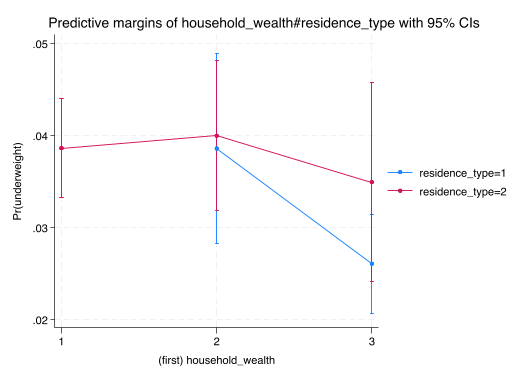

In [43]:
margins household_wealth#residence_type
marginsplot

In [44]:
log close

      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health
> /Log for MA Thesis.smcl
  log type:  smcl
 closed on:  11 Feb 2025, 10:26:34
-------------------------------------------------------------------------------
